In [1]:
import matplotlib.pyplot as plt
from rank import RANK
from tank import TANK
import pandas as pd
import numpy as np
import params

np.set_printoptions(suppress=True, precision=10, linewidth=250)
plt.style.use('default')
plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    "text.usetex": True,     # use inline math for ticks
    "pgf.rcfonts": False     # don't setup fonts from rc parameters
})

In [2]:
# paramaters
PAGE_WIDTH = 6.5 # 8.5 in page - 2*1 in margins
T = 1000 # max time
T_SHOW = 100
seed=1000

save = True

In [3]:
# initialize models
rank = RANK(params)
tank = TANK(params)

# irfs
rank_sim = rank.run_simulation(T, seed=seed, pct=False, act=True)
tank_sim = tank.run_simulation(T, seed=seed, pct=False, act=True)

/Users/gavinengelstad/Documents/Documents - Gavin’s MacBook Pro/School/Spring '24/Macro/Capstone/draft/code/utils.py:99: UserWarning: LTI did not converge. Error: 4.76837158203125e-07
  warnings.warn(f'LTI did not converge. Error: {err}')
/Users/gavinengelstad/Documents/Documents - Gavin’s MacBook Pro/School/Spring '24/Macro/Capstone/draft/code/utils.py:99: UserWarning: LTI did not converge. Error: 3.814697265625e-06
  warnings.warn(f'LTI did not converge. Error: {err}')


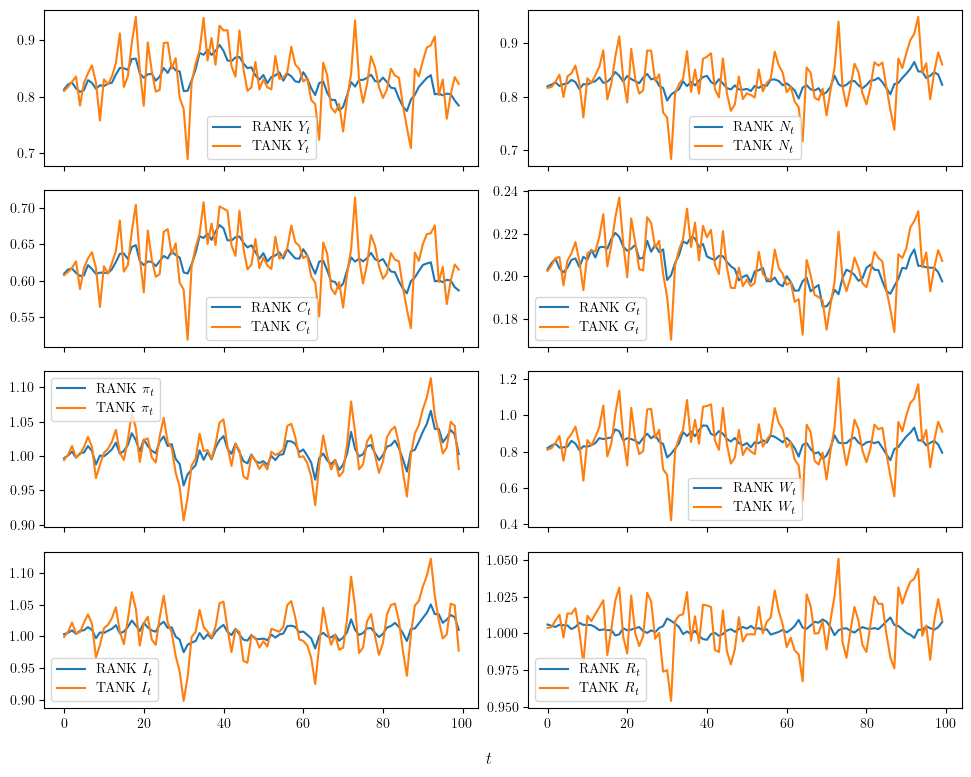

In [4]:
# plot the aggregate variables
fig, ax = plt.subplots(4, 2, sharex=True)
fig.set_figwidth(PAGE_WIDTH*1.5)
fig.set_figheight(PAGE_WIDTH*1.5*4/2.5/2)
fig.supxlabel(r'$t$')

# Y
ax[0, 0].plot(range(T_SHOW), rank_sim.T[:T_SHOW, 1], label=RANK.LABELS[1])
ax[0, 0].plot(range(T_SHOW), tank_sim.T[:T_SHOW, 1], label=TANK.LABELS[1])

# N
ax[0, 1].plot(range(T_SHOW), rank_sim.T[:T_SHOW, 3], label=RANK.LABELS[3])
ax[0, 1].plot(range(T_SHOW), tank_sim.T[:T_SHOW, 5], label=TANK.LABELS[5])

# C
ax[1, 0].plot(range(T_SHOW), rank_sim.T[:T_SHOW, 2], label=RANK.LABELS[2])
ax[1, 0].plot(range(T_SHOW), tank_sim.T[:T_SHOW, 2], label=TANK.LABELS[2])

# G
ax[1, 1].plot(range(T_SHOW), rank_sim.T[:T_SHOW, 4], label=RANK.LABELS[4])
ax[1, 1].plot(range(T_SHOW), tank_sim.T[:T_SHOW, 9], label=TANK.LABELS[9])

# pi
ax[2, 0].plot(range(T_SHOW), rank_sim.T[:T_SHOW, 6], label=RANK.LABELS[6])
ax[2, 0].plot(range(T_SHOW), tank_sim.T[:T_SHOW, 12], label=TANK.LABELS[12])

# W
ax[2, 1].plot(range(T_SHOW), rank_sim.T[:T_SHOW, 0], label=RANK.LABELS[0])
ax[2, 1].plot(range(T_SHOW), tank_sim.T[:T_SHOW, 0], label=TANK.LABELS[0])

# I
ax[3, 0].plot(range(T_SHOW), rank_sim.T[:T_SHOW, 9], label=RANK.LABELS[9])
ax[3, 0].plot(range(T_SHOW), tank_sim.T[:T_SHOW, 15], label=TANK.LABELS[15])

# R
ax[3, 1].plot(range(T_SHOW), rank_sim.T[:T_SHOW, 10], label=RANK.LABELS[10])
ax[3, 1].plot(range(T_SHOW), tank_sim.T[:T_SHOW, 16], label=TANK.LABELS[16])

fig.tight_layout()
for i in range(8):
    ax.take(i).legend()
if save: fig.savefig('../document/graphs/sim_rank_v_tank.pdf', bbox_inches='tight', pad_inches=0.05)

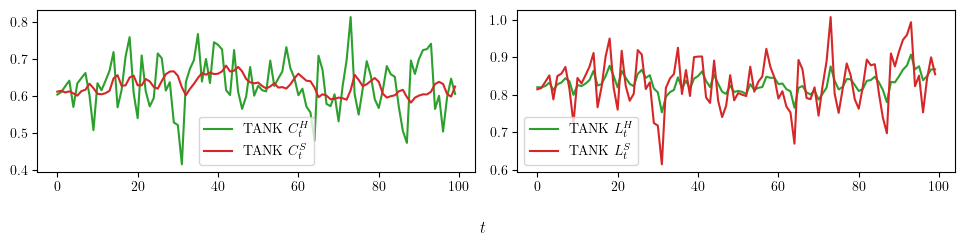

In [5]:
# plot agent differeces
fig, ax = plt.subplots(1, 2, sharex=True)
fig.set_figwidth(PAGE_WIDTH*1.5)
fig.set_figheight(PAGE_WIDTH*1.5*1/4)
fig.supxlabel(r'$t$')

# c
ax[0].plot(tank_sim.T[:T_SHOW, 3], label=TANK.LABELS[3], c='tab:green')
ax[0].plot(tank_sim.T[:T_SHOW, 4], label=TANK.LABELS[4], c='tab:red')

# l
ax[1].plot(tank_sim.T[:T_SHOW, 6], label=TANK.LABELS[6], c='tab:green')
ax[1].plot(tank_sim.T[:T_SHOW, 7], label=TANK.LABELS[7], c='tab:red')

fig.tight_layout()
for i in range(2):
    ax.take(i).legend()
if save: fig.savefig('../document/graphs/sim_htm_vs_saver.pdf', bbox_inches='tight', pad_inches=0.05)

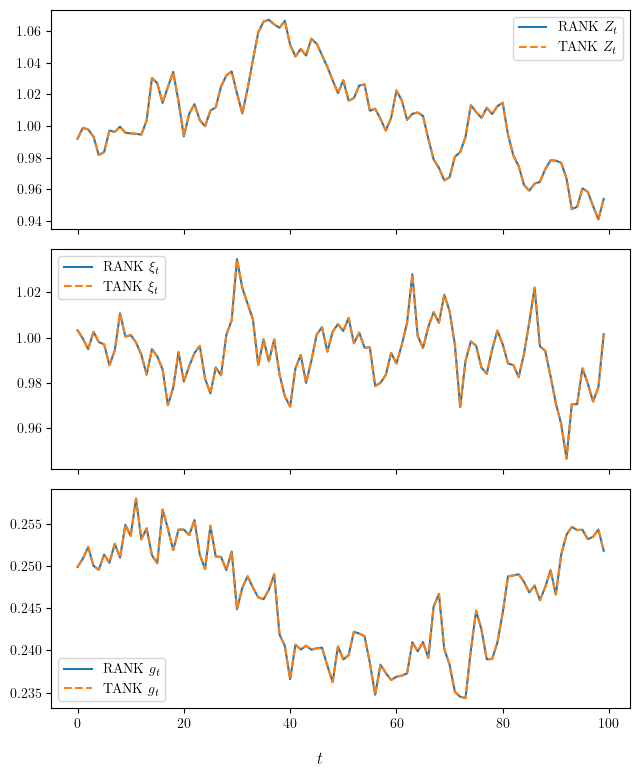

In [6]:
# plot the paths
fig, ax = plt.subplots(3, sharex=True)
fig.set_figwidth(PAGE_WIDTH)
fig.set_figheight(PAGE_WIDTH*3/2.5)
fig.supxlabel(r'$t$')

# Z
ax[0].plot(range(T_SHOW), rank_sim.T[:T_SHOW, 11], label=RANK.LABELS[11])
ax[0].plot(range(T_SHOW), tank_sim.T[:T_SHOW, 17], '--', label=TANK.LABELS[17])

# xi
ax[1].plot(range(T_SHOW), rank_sim.T[:T_SHOW, 12], label=RANK.LABELS[12])
ax[1].plot(range(T_SHOW), tank_sim.T[:T_SHOW, 18], '--', label=TANK.LABELS[18])

# g
ax[2].plot(range(T_SHOW), rank_sim.T[:T_SHOW, 13], label=RANK.LABELS[13])
ax[2].plot(range(T_SHOW), tank_sim.T[:T_SHOW, 19], '--', label=TANK.LABELS[19])

for i in range(3):
    ax[i].legend()
fig.tight_layout()
if save: fig.savefig('../document/graphs/sim_stoch_paths.pdf', bbox_inches='tight', pad_inches=0.05)

In [7]:
# summary stats (rank)
pd.DataFrame(rank_sim.T, columns=RANK.LABELS).describe()

,RANK $W_t$,RANK $Y_t$,RANK $C_t$,RANK $N_t$,RANK $G_t$,RANK $\Lambda_t$,RANK $\pi_t$,RANK $P^A_t$,RANK $P^B_t$,RANK $I_t$,RANK $R_t$,RANK $Z_t$,RANK $\xi_t$,RANK $g_t$
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.833442,0.821170,0.616908,0.821887,0.204262,0.834168,1.000388,3.250051,3.246284,1.005191,1.004885,0.999128,0.999584,0.248746
std,0.047340,0.030029,0.022325,0.013646,0.009612,0.040784,0.020635,0.739172,0.539815,0.014054,0.003600,0.033955,0.017407,0.006061
min,0.684529,0.735565,0.555497,0.775032,0.173565,0.694563,0.930563,0.715880,1.390741,0.959800,0.993355,0.890578,0.945472,0.231934
25%,0.804246,0.801408,0.600418,0.813210,0.198144,0.808422,0.987036,2.781876,2.905197,0.995582,1.002506,0.976535,0.987992,0.245093
50%,0.834255,0.820542,0.616254,0.822024,0.204391,0.834464,1.001028,3.266396,3.253597,1.005718,1.004917,0.999229,0.999577,0.249079
75%,0.865680,0.840116,0.631594,0.830663,0.210877,0.861492,1.014423,3.747074,3.607091,1.014531,1.007303,1.020187,1.010974,0.252462
max,0.972064,0.896693,0.676510,0.865308,0.232720,0.960646,1.065758,5.566573,4.927470,1.050274,1.016037,1.107661,1.059156,0.268329


In [8]:
# summary stats (tank)
pd.DataFrame(tank_sim.T, columns=TANK.LABELS).describe()

,TANK $W_t$,TANK $Y_t$,TANK $C_t$,TANK $C^H_t$,TANK $C^S_t$,TANK $N_t$,TANK $L^H_t$,TANK $L^S_t$,TANK $B^S_t$,TANK $G_t$,TANK $T_t$,TANK $\Lambda_t$,TANK $\pi_t$,TANK $P^A_t$,TANK $P^B_t$,TANK $I_t$,TANK $R_t$,TANK $Z_t$,TANK $\xi_t$,TANK $g_t$
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.833985,0.821349,0.617042,0.617179,0.616906,0.822066,0.821975,0.822157,0.001267,0.204307,0.204094,0.834712,1.000499,3.249939,3.245085,1.005360,1.004997,0.999128,0.999584,0.248746
std,0.140368,0.052424,0.039059,0.071316,0.028530,0.045885,0.028104,0.068463,0.305819,0.014548,0.050285,0.139103,0.035525,0.874799,0.539484,0.038347,0.017348,0.033955,0.017407,0.006061
min,0.367630,0.647181,0.490831,0.391062,0.514767,0.666976,0.724762,0.593258,-0.957131,0.156349,0.020855,0.365953,0.869379,0.167030,1.397567,0.867562,0.948593,0.890578,0.945472,0.231934
25%,0.747479,0.787360,0.590664,0.568412,0.597063,0.793285,0.804295,0.776778,-0.212128,0.194494,0.168198,0.744458,0.977269,2.683761,2.891435,0.979893,0.993083,0.976535,0.987992,0.245093
50%,0.832603,0.821478,0.616812,0.615216,0.616855,0.821618,0.822451,0.820184,0.013434,0.204852,0.203760,0.833150,1.001311,3.253673,3.251270,1.006067,1.005134,0.999229,0.999577,0.249079
75%,0.924377,0.856344,0.643105,0.667202,0.638486,0.852661,0.839842,0.867655,0.212605,0.213926,0.239990,0.927287,1.022928,3.804995,3.589519,1.028372,1.016841,1.020187,1.010974,0.252462
max,1.275872,0.980211,0.736003,0.822094,0.706969,0.960716,0.906633,1.018110,0.923973,0.255855,0.370020,1.256110,1.113298,6.079894,4.978745,1.121943,1.063751,1.107661,1.059156,0.268329
